Name: Rudy Orre  
Section: 0130  
Date: 25 April 2021

# Homework 6: Probability, Simulation, Estimation, and Assessing Models

**Reading**: 
* [Randomness](https://www.inferentialthinking.com/chapters/09/randomness.html) 
* [Sampling and Empirical Distributions](https://www.inferentialthinking.com/chapters/10/sampling-and-empirical-distributions.html)
* [Testing Hypotheses](https://www.inferentialthinking.com/chapters/11/testing-hypotheses.html)

Please complete this notebook by filling in the cells provided. Before you begin, execute the following cell to load the provided tests. Each time you start your server, you will need to execute this cell again to load the tests.

Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged. Refer to the policies page to learn more about how to learn cooperatively.

For all problems that you must write our explanations and sentences for, you **must** provide your answer in the designated space. Moreover, throughout this homework and all future ones, please be sure to not re-assign variables throughout the notebook! For example, if you use `max_temperature` in your answer to one question, do not reassign it later on.

In [1]:
pip install gofer-grader

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Don't change this cell; just run it. 

import numpy as np
from datascience import *

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

from gofer.ok import check

## 1. Probability


We will be testing some probability concepts that were introduced in lecture. For all of the following problems, we will introduce a problem statement and give you a proposed answer. Next, for each of the following questions, you must assign the provided variable to one of three integers. You are more than welcome to create more cells across this notebook to use for arithmetic operations, but be sure to assign the provided variable to 1, 2, or 3 in the end. 

1. Assign the variable to 1 if you believe our proposed answer is too low.
2. Assign the variable to 2 if you believe our proposed answer is correct.
3. Assign the variable to 3 if you believe our proposed answer is too high.

**Question 1.** You roll a 6-sided die 10 times. What is the chance of getting 10 sixes?

Our proposed answer: $$(\frac{1}{6})^{10}$$

Assign `ten_sixes` to either 1, 2, or 3 depending on if you think our answer is too low, correct, or too high. 

In [3]:
ten_sixes = 2
ten_sixes

2

In [4]:
check('tests/q1_1.py')

**Question 2.** Take the same problem set-up as before, rolling a fair dice 10 times. What is the chance that every roll is less than or equal to 5?

Our proposed answer: $$1 - (\frac{1}{6})^{10}$$

Assign `five_or_less` to either 1, 2, or 3. 

In [5]:
(5/6)**10

0.1615055828898458

In [6]:
five_or_less = 3
five_or_less

3

In [7]:
check('tests/q1_2.py')

**Question 3.** Assume we are picking a lottery ticket. We must choose three distinct numbers from 1 to 100 and write them on a ticket. Next, someone picks three numbers one by one, each time without putting the previous number back in. We win if our numbers are all called. 

If we decide to play the game and pick our numbers as 12, 14, and 89, what is the chance that we win? 

Our proposed answer: $$(\frac{3}{100})^3$$

Assign `lottery` to either 1, 2, or 3. 

In [8]:
(1/100)*(1/99)*(1/98) - (3/100)**3

-2.5969284683570393e-05

In [9]:
lottery = 3

In [10]:
check('tests/q1_3.py')

**Question 4.** Assume we have two lists, list A and list B. List A contains the numbers [10,20,30], while list B contains the numbers [10,20,30,40]. We choose one number from list A randomly and one number from list B randomly. What is the chance that the number we drew from list A is larger than the number we drew from list B?

Our proposed solution: $$1/4$$

Assign `list_chances` to either 1, 2, or 3. 

In [11]:
list_chances = 2

In [12]:
check('tests/q1_4.py')

## 2. Monkeys Typing Shakespeare
##### (...or at least the string "datascience")

A monkey is banging repeatedly on the keys of a typewriter. Each time, the monkey is equally likely to hit any of the 26 lowercase letters of the English alphabet, regardless of what it has hit before. There are no other keys on the keyboard.

**Question 1.** Suppose the monkey hits the keyboard 11 times.  Compute the chance that the monkey types the sequence `datascience`.  (Call this `datascience_chance`.) Use algebra and type in an arithmetic equation that Python can evalute.

In [13]:
datascience_chance = (1/26)**11
datascience_chance

2.7245398995795435e-16

In [14]:
check('tests/q2_1.py')

**Question 2.** Write a function called `simulate_key_strike`.  It should take **no arguments**, and it should return a random one-character string that is equally likely to be any of the 26 lower-case English letters. 

In [15]:
# We have provided the code below to compute a list called letters,
# containing all the lower-case English letters.  Print it if you
# want to verify what it contains.
import string
letters = list(string.ascii_lowercase)

def simulate_key_strike():
    """Simulates one random key strike."""
    return np.random.choice(letters)

# An example call to your function:
simulate_key_strike()

'm'

In [16]:
check('tests/q2_2.py')

**Question 3.** Write a function called `simulate_several_key_strikes`.  It should take one argument: an integer specifying the number of key strikes to simulate. It should return a string containing that many characters, each one obtained from simulating a key strike by the monkey.

*Hint:* If you make a list or array of the simulated key strikes, you can convert that to a string by calling `"".join(key_strikes_array)` (if your array is called `key_strikes_array`).

In [17]:
def simulate_several_key_strikes(num_strikes):
    # Fill in this function.  Our solution used several lines
    # of code.
    return ''.join([simulate_key_strike() for _ in range(num_strikes)])

# An example call to your function:
simulate_several_key_strikes(11)

'ngzbrikvvkq'

In [18]:
check('tests/q2_3.py')

**Question 4.** Use `simulate_several_key_strikes` 1000 times, each time simulating the monkey striking 11 keys.  Compute the proportion of times the monkey types `"datascience"`, calling that proportion `datascience_proportion`.

In [19]:
# Your solution may take more than one line.
datascience_proportion = sum([simulate_several_key_strikes(11) == 'datascience' for _ in range(1000)]) / 1000
datascience_proportion

0.0

In [20]:
check('tests/q2_4.py')

**Question 5.** Check the value your simulation computed for `datascience_proportion`.  Is your simulation a good way to estimate the chance that the monkey types `"datascience"` in 11 strikes (the answer to question 1)?  Why or why not?

This is not a good way to estimate the chance that the monkey types "datascience", since the probability of randomly writing "datascience" with random characters is 2.7e-16, which is far smaller than the lowest non-zero proportion that this sample we generated could compute, which is only 1e-3. That's about 15 order magnitudes away, making it less likely for me to get "datascience" through this simulation than it is for me to win the actual lottery.

**Question 6.** Compute the chance that the monkey types the letter `"e"` at least once in the 11 strikes.  Call it `e_chance`. Use algebra and type in an arithmetic equation that Python can evalute. 

In [21]:
e_chance = 1 - (25/26) ** 11
e_chance

0.35041906843673165

In [22]:
check('tests/q2_6.py')

**Question 7.** Do you think that a computer simulation is more or less effective to estimate `e_chance` compared to when we tried to estimate `datascience_chance` this way? Why or why not? (You don't need to write a simulation, but it is an interesting exercise.)

*Write your answer here, replacing this text.*

## 3. Sampling Basketball Players


This exercise uses salary data and game statistics for basketball players from the 2014-2015 NBA season. The data was collected from [Basketball-Reference](http://www.basketball-reference.com) and [Spotrac](http://www.spotrac.com).

Run the next cell to load the two datasets.

In [23]:
player_data = Table.read_table('player_data.csv')
salary_data = Table.read_table('salary_data.csv')
player_data.show(3)
salary_data.show(3)

Name,Age,Team,Games,Rebounds,Assists,Steals,Blocks,Turnovers,Points
James Harden,25,HOU,81,459,565,154,60,321,2217
Chris Paul,29,LAC,82,376,838,156,15,190,1564
Stephen Curry,26,GSW,80,341,619,163,16,249,1900


PlayerName,Salary
Kobe Bryant,23500000
Amar'e Stoudemire,23410988
Joe Johnson,23180790


**Question 1.** We would like to relate players' game statistics to their salaries.  Compute a table called `full_data` that includes one row for each player who is listed in both `player_data` and `salary_data`.  It should include all the columns from `player_data` and `salary_data`, except the `"PlayerName"` column.

In [24]:
full_data = player_data.join('Name', salary_data.relabel('PlayerName', 'Name'))
full_data

Name,Age,Team,Games,Rebounds,Assists,Steals,Blocks,Turnovers,Points,Salary
A.J. Price,28,TOT,26,32,46,7,0,14,133,62552
Aaron Brooks,30,CHI,82,166,261,54,15,157,954,1145685
Aaron Gordon,19,ORL,47,169,33,21,22,38,243,3992040
Adreian Payne,23,TOT,32,162,30,19,9,44,213,1855320
Al Horford,28,ATL,76,544,244,68,98,100,1156,12000000
Al Jefferson,30,CHO,65,548,113,47,84,68,1082,13666667
Al-Farouq Aminu,24,DAL,74,342,59,70,62,55,412,1100602
Alan Anderson,32,BRK,74,204,83,56,5,60,545,1276061
Alec Burks,23,UTA,27,114,82,17,5,52,374,3034356
Alex Kirk,23,CLE,5,1,1,0,0,0,4,507336


In [25]:
check('tests/q3_1.py')

Basketball team managers would like to hire players who perform well but don't command high salaries.  From this perspective, a very crude measure of a player's *value* to their team is the number of points the player scored in a season for every **\$1000 of salary** (*Note*: the `Salary` column is in dollars, not thousands of dollars). For example, Al Horford scored 1156 points and has a salary of **\$12 million.** This is equivalent to 12,000 thousands of dollars, so his value is $\frac{1156}{12000}$.

**Question 2.** Create a table called `full_data_with_value` that's a copy of `full_data`, with an extra column called `"Value"` containing each player's value (according to our crude measure).  Then make a histogram of players' values.  **Specify bins that make the histogram informative, and don't forget your units!** Remember that `hist()` takes in an optional third argument that allows you to specify the units!

*Hint*: Informative histograms contain a majority of the data and **exclude outliers**.

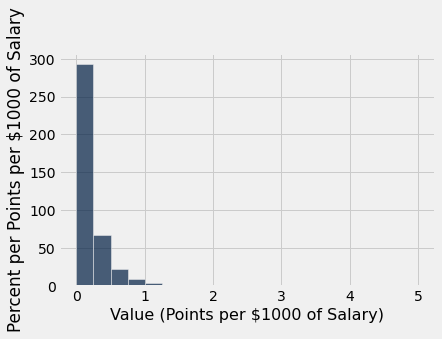

In [26]:
value_column = full_data.column('Points') / full_data.column('Salary') * 1000
full_data_with_value = full_data.copy().with_column('Value', value_column)
value_bins = np.arange(np.min(full_data_with_value.column('Value')), np.max(full_data_with_value.column('Value')), 0.25)
full_data_with_value.hist('Value', bins=value_bins, unit='Points per $1000 of Salary')

Now suppose we weren't able to find out every player's salary (perhaps it was too costly to interview each player).  Instead, we have gathered a *simple random sample* of 100 players' salaries.  The cell below loads those data.

In [27]:
sample_salary_data = Table.read_table("sample_salary_data.csv")
sample_salary_data.show(3)

PlayerName,Salary
C.J. Watson,2106720
Taj Gibson,8000000
Jerrelle Benimon,35000


**Question 3.** Make a histogram of the values of the players in `sample_salary_data`, using the same method for measuring value we used in question 2.  **Use the same bins, too.**  

*Hint:* This will take several steps.

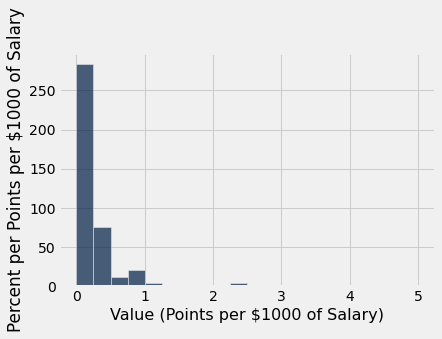

In [28]:
# Use this cell to make your histogram.
sample_data_with_value = sample_salary_data.copy().select(0).relabel('PlayerName','Name').join('Name', full_data)
sample_value_column = sample_data_with_value.column('Points') / sample_data_with_value.column('Salary') * 1000
sample_data_with_value = sample_data_with_value.with_column('Value', sample_value_column)
sample_data_with_value.hist('Value', bins=value_bins, unit='Points per $1000 of Salary')

Now let us summarize what we have seen.  To guide you, we have written most of the summary already.

**Question 4.** Complete the statements below by filling in the [SQUARE BRACKETS]. 

*Hint 1:* For a refresher on distribution types, check out [Section 10.1](https://www.inferentialthinking.com/chapters/10/1/empirical-distributions.html)

*Hint 2:* The `hist()` table method ignores data points outside the range of its bins, but you may ignore this fact and calculate the areas of the bars using what you know about histograms from lecture. 

In [29]:
sum(full_data_with_value.column('Value')), sum(sample_data_with_value.column('Value'))

(109.9152016307369, 23.679566022372715)

The plot in question 2 displayed a(n) probability distribution of the population of 492 players.  The areas of the bars in the plot sum to 109.915.

The plot in question 3 displayed a(n) empirical distribution of the sample of 100 players.  The areas of the bars in the plot sum to  23.680.

**Question 5.** For which range of values does the plot in question 3 better depict the distribution of the **population's player values**: 0 to 0.5, or above 0.5? Explain your answer. 

The better depiction of the population's player value distribution is in the 0 to 0.5 range, simply because that range of values just has more data, and becomes more accurate with more data. On the other hand, past 0.5 is very few data points in the population, so sampling from the population will also yield fewer data points above 0.5, and therefore becomes less accurate.

## 4. Earthquakes


The next cell loads a table containing information about **every earthquake with a magnitude above 4.5** in 2017, compiled by the US Geological Survey. (source: https://earthquake.usgs.gov/earthquakes/search/)

In [30]:
earthquakes = Table().read_table('earthquakes_2017.csv').select(['time', 'mag', 'place'])
earthquakes

time,mag,place
2017-12-31T23:48:50.980Z,4.8,"30km SSE of Pagan, Northern Mariana Islands"
2017-12-31T20:59:02.500Z,5.1,Southern East Pacific Rise
2017-12-31T20:27:49.450Z,5.2,Chagos Archipelago region
2017-12-31T19:42:41.250Z,4.6,"18km NE of Hasaki, Japan"
2017-12-31T16:02:59.920Z,4.5,Western Xizang
2017-12-31T15:50:22.510Z,4.5,"156km SSE of Longyearbyen, Svalbard and Jan Mayen"
2017-12-31T14:53:32.590Z,5.1,"41km S of Daliao, Philippines"
2017-12-31T14:51:58.200Z,5.1,"132km SSW of Lata, Solomon Islands"
2017-12-31T12:24:13.150Z,4.6,"79km SSW of Hirara, Japan"
2017-12-31T04:02:18.500Z,4.8,"10km W of Korini, Greece"


There are a several earthquakes that occurred in 2017 that we're interested in, and generally, we won't have access to this large population. Instead, if we sample correctly, we can take a small subsample of earthquakes in this year to get an idea about the distribution of magnitudes throughout the year!

**Question 1.** In the following lines of code, we take two different samples from the earthquake table, and calculate the mean of the magnitudes of these earthquakes. Are these samples representative of the population of earthquakes in the original table (that is, the should we expect the mean to be close to the population mean)? 

*Hint:* Consider the ordering of the `earthquakes` table. 

In [31]:
sample1 = earthquakes.sort('mag', descending = True).take(np.arange(100))
sample1_magnitude_mean = np.mean(sample1.column('mag'))
sample2 = earthquakes.take(np.arange(100))
sample2_magnitude_mean = np.mean(sample2.column('mag'))
[sample1_magnitude_mean, sample2_magnitude_mean]

[6.422999999999999, 4.7749999999999995]

Sample 1 mean will definitely not be representative of the population mean, since it sorts the magnitudes in descending order, takes the first 100, and gets the mean from that. This means that sample 1 is essentially taking the mean of the 100 biggest earthquakes, out of a population of 6000+ earthquakes.

Sample 2 mean should be closer to the population mean, however not necessarily a good representation of the mean since it just takes the average of the first 100 earthquakes in the file, which looks like it is sorted by time. If the earthquake probability distribution stays constant through time, then this mean will likely be a good representation of the true mean. However, if for some reason the probability distribution of earthquake magnitudes change over time, then this will not be a good representation of the true mean, since the next 6000 earthquakes may tend to be greater or lesser in magnitude than the first 100.

**Question 2.** Write code producing a sample that should represent the population of size 500 then take the mean of the magnitudes of the earthquakes in this sample. Assign these to `representative_sample` and `representative_mean` respectively. 

*Hint:* In class, what sort of samples can properly represent the population?

In [32]:
representative_sample = earthquakes.sample(500)
representative_mean = np.mean(representative_sample.column('mag'))
representative_mean

4.831200000000001

In [33]:
check('tests/q4_2.py')

**Question 3.** Suppose we want to figure out what the biggest magnitude earthquake was in 2017, but we are tasked with doing this only with a sample of 500 from the earthquakes table. 

To determine whether trying to find the biggest magnitude from a sample is a plausible idea, write code that simulates the maximum of a random sample of size 500 from the `earthquakes` table 5000 times. Assign your array of maximums to `maximums`. 

In [34]:
maximums = np.zeros(5000)
for i in np.arange(0,5000): 
    maximums[i] = np.max(earthquakes.sample(500).column('mag'))

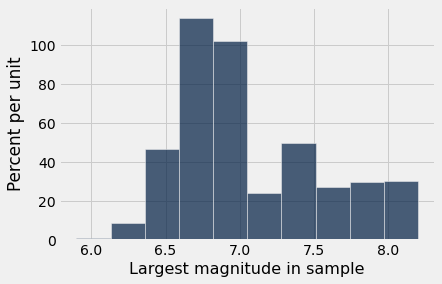

In [35]:
#Histogram of your maximums
Table().with_column('Largest magnitude in sample', maximums).hist('Largest magnitude in sample') 

In [36]:
check('tests/q4_3.py')

**Question 4.** We want to see if a random sample of size 500 is likely to help you determine the largest magnitude earthquake in the population. To help determine this, find the magnitude of the (actual) strongest earthquake in 2017.

In [37]:
strongest_earthquake_magnitude = earthquakes.sort('mag', descending=True).column('mag').item(0)
strongest_earthquake_magnitude

8.2

In [38]:
check('tests/q4_4.py')

**Question 5.** Explain whether you believe you can accurately use a sample size of 500 to determine the maximum. What is a specific con of using the maximum as your estimator? Use the histogram above to help answer. 

I do not think you can accurately use a sample size of 500 to determine the maximum, since there are 6000+ entries in the population, so the probability of getting the actual maximum would be about 500/6000 = 5/60 = 8.33%. However, probability of getting near the maximum would be entirely possible, unless the maximum values are very far outliers.

## 5. Assessing Gary's Models
#### Games with Gary

Our friend Gary comes over and asks us to play a game with him. The game works like this: 

> We will flip a fair coin 10 times, and if the number of heads is greater than or equal to 5, we win!
> 
> Otherwise, Gary wins.

We play the game once and we lose, observing 1 head. We are angry and accuse Gary of cheating! Gary is adamant, however, that the coin is fair.

Gary's model claims that there is an equal chance of getting heads or tails, but we do not believe him. We believe that the coin is clearly rigged, with heads being less likely than tails. 

#### Question 1
Assign `coin_model_probabilities` to a two-item array containing the chance of heads as the first element and the chance of tails as the second element under Gary's model. Make sure your values are between 0 and 1. 

In [39]:
coin_model_probabilities = make_array(0.5, 0.5)
coin_model_probabilities

array([0.5, 0.5])

In [40]:
check('tests/q5_1.py')

**Question 2**

We believe Gary's model is incorrect. In particular, we believe there to be a smaller chance of heads. Which of the following statistics can we use during our simulation to test between the model and our alternative? Assign `statistic_choice` to the correct answer. 

1. The distance (absolute value) between the actual number of heads in 10 flips and the expected number of heads in 10 flips (5)
2. The expected number of heads in 10 flips
3. The actual number of heads we get in 10 flips



In [41]:
statistic_choice = 2
statistic_choice

2

#### Question 3

Define the function `coin_simulation_and_statistic`, which, given a sample size and an array of model proportions (like the one you created in Q1), returns the number of heads in one simulation of flipping the coin under the model specified in `model_proportions`. 

*Hint:* Think about how you can use the function `sample_proportions`. 

In [42]:
def coin_simulation_and_statistic(sample_size, model_proportions):
    return sample_proportions(sample_size, model_proportions)[0] * sample_size

coin_simulation_and_statistic(10, coin_model_probabilities)

3.0

In [43]:
check('tests/q5_3.py')

**Question 4** 

Use your function from above to simulate the flipping of 10 coins 5000 times under the proportions that you specified in problem 1. Keep track of all of your statistics in `coin_statistics`. 

In [44]:
coin_statistics = np.zeros(5000)
repetitions = 5000

for i in range(repetitions):
    coin_statistics[i] = coin_simulation_and_statistic(10, coin_model_probabilities)

coin_statistics

array([7., 7., 4., ..., 6., 4., 4.])

In [45]:
check('tests/q5_4.py')

Let's take a look at the distribution of statistics, using a histogram. 

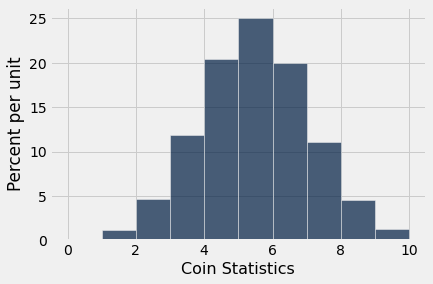

In [46]:
#Draw a distribution of statistics 
Table().with_column('Coin Statistics', coin_statistics).hist()

#### Question 5
Given your observed value, do you believe that Gary's model is reasonable, or is our alternative more likely? Explain your answer using the distribution drawn in the previous problem. 

based off of the data, out of the 5000 simulations, only about 1% of the simulations produced a single head. This means that Gary's model is within the 5% critical area, make it probable that Gary's model is unreasonable.

## 6. Submission


Congratulations, you're done with Homework 6!  Be sure to 
- **run all the tests and verify that they all pass** (the next cell has a shortcut for that), 
- **Save and Checkpoint** from the `File` menu,
- **Hit the Submit button** Your submission will be saved and grade will be posted when it's finished running.

In [47]:
# For your convenience, you can run this cell to run all the tests at once!
import glob
from gofer.ok import grade_notebook
if not globals().get('__GOFER_GRADER__', False):
    display(grade_notebook('hw06.ipynb', sorted(glob.glob('tests/q*.py'))))

['tests/q1_1.py', 'tests/q1_2.py', 'tests/q1_3.py', 'tests/q1_4.py', 'tests/q2_1.py', 'tests/q2_2.py', 'tests/q2_3.py', 'tests/q2_4.py', 'tests/q2_6.py', 'tests/q3_1.py', 'tests/q4_2.py', 'tests/q4_3.py', 'tests/q4_4.py', 'tests/q5_1.py', 'tests/q5_3.py', 'tests/q5_4.py']
Question 1:


Question 2:


Question 3:


Question 4:


Question 5:


Question 6:


Question 7:


Question 8:


Question 9:


Question 10:


Question 11:


Question 12:


Question 13:


Question 14:


Question 15:


Question 16:


1.0

Name: Rudy Orre  
Section: 0130  
Date: 25 April 2021